# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

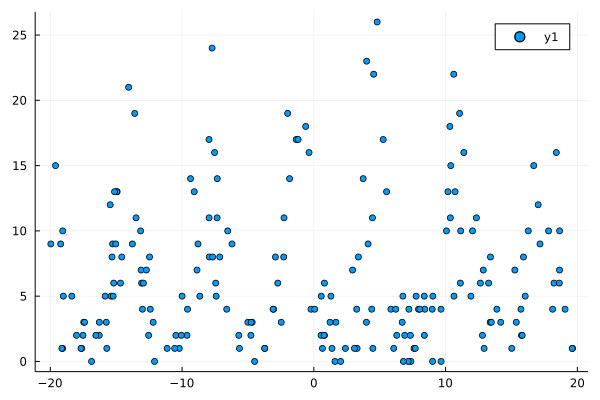

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -593.4121367546959
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.424235 seconds (7.02 M allocations: 447.371 MiB, 4.74% gc time, 97.82% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.3648114178442331, 0.551777578028816, 0.45130253123968156, 0.37216429086013364, 0.37556656468743593, 0.5940367454772668, 0.3735383141694313, 0.2765865767082821, 0.40585806398331087, 0.32650831738723185  …  0.36728822316867843, 0.37879882223036665, 0.5223795741862742, 0.4728135403930496, 0.29235480396375535, 0.503699006949186, 0.30430061960418725, 0.21766086235049323, 0.5850417313768604, 0.3704664063377339], θ = [5.934330159083646, 15.118356376879122, 2.4584147013397084, 8.897539217783153, 8.895683457317517, 2.4289882179390907, 13.839453727110712, 5.9620402985943635, 4.9324783507142325, 3.4692340401348454  …  7.911263115038705, 6.917482181421625, 9.289706312284443, 11.781334385910812, 7.447033087110265, 3.427830934811148, 3.473239766540231, 2.988211782258271, 2.9172622889033573, 2.9661531174131284]), opt_state = (NamedTuple(),), hyperopt_state = (N

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -693.1114199354726
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.168314 seconds (4.44 M allocations: 311.674 MiB, 2.81% gc time, 96.64% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.275585103141358) infered by Analytic Variational Inference , (local_vars = (c = [0.26186150483030973, 0.5183699041708896, 0.6709059394787404, 0.27224193277292036, 0.26674119131911167, 0.7992797283764427, 0.278529046281787, 0.1555813307978025, 0.319160595002753, 0.5253779970480403  …  0.2614570266166038, 0.2811402406193608, 0.4810825995696073, 0.40851379442392066, 0.16978624625911454, 0.7090507563894167, 0.5248515229299171, 0.35047090765970296, 0.7917455774767415, 0.565220696101387], θ = [6.653947624556781, 15.349098991541359, 4.516600816384674, 9.57150911252105, 9.638483553802503, 4.612293506126075, 14.53502240111505, 6.902611109600073, 5.492427900057153, 5.300882862753001  …  8.629082456664374, 7.603407692981292, 9.577541444848327, 12.221695960632779, 8.352584223527186, 5.50570761125853, 5.314961255690879, 4.544806148015722, 5.065536370722302, 4.814705202788141], γ = [6.383853618946376, 5.382541683313455, 9.36951815045343

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

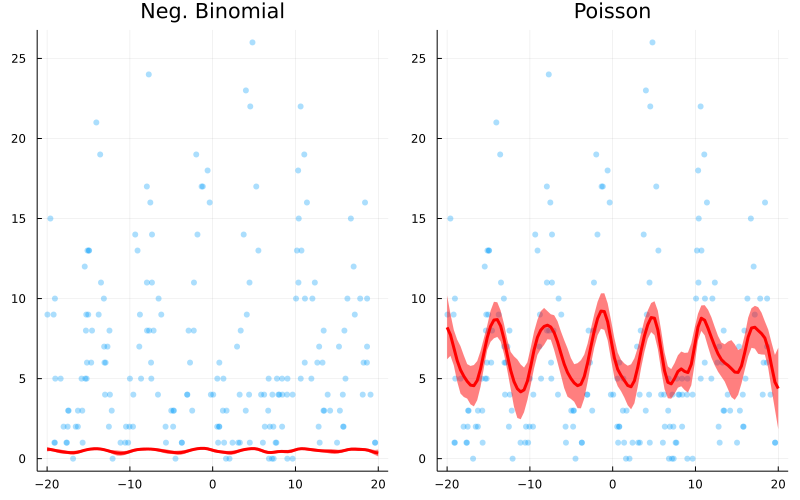

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*